## Human 계정의 분포

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("../3.통합/4.주당평균_파생변수/train_create_mean.csv")
human = pd.read_csv("../4.분류/Human-Auto 분리/id_human_2.csv")
train = pd.merge(train, human, how='inner')

print(train.shape)
print("----------------------------")
print("----------------------------")
print(train.head())
print("----------------------------")
print("----------------------------")
print(train.columns)

(67801, 116)
----------------------------
----------------------------
                                              acc_id     label  activated_wk  \
0  0001f130e89288ff0df167b998f6eb7085687f411fcb72...  retained             8   
1  0004733c4175d61e67d1ec9d3602f6c3341180800bc8bf...     month             1   
2  0007838a3f353aa4a4c938d42ee43a2fa51b03557e624a...      week             2   
3  0007fbe4b83e20cff64868930838e80e7cbc44a68943ae...      week             2   
4  0008086e0aaed17eac6794214ceafca85245fda11aae86...      week             1   

   avg_cnt_dt  avg_play_time  avg_npc_exp  avg_npc_hongmun  avg_quest_exp  \
0       3.125       1.637500          0.0              0.0            0.0   
1       5.000       4.766667          0.0              0.0            0.0   
2       3.000     510.441667      36553.0              0.0       443405.0   
3       4.000    3738.033333      28297.0         602281.0      2149060.0   
4       1.000     617.433333      30066.0              0.0     

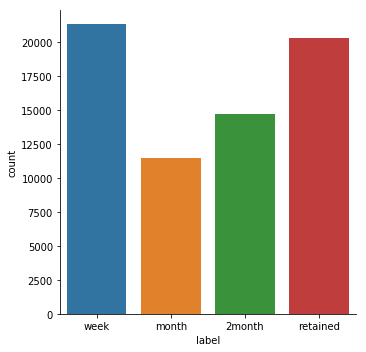

In [3]:
order = ["week", "month", "2month", "retained"]

sns.catplot("label", kind="count", data=train, order=order)
plt.show()

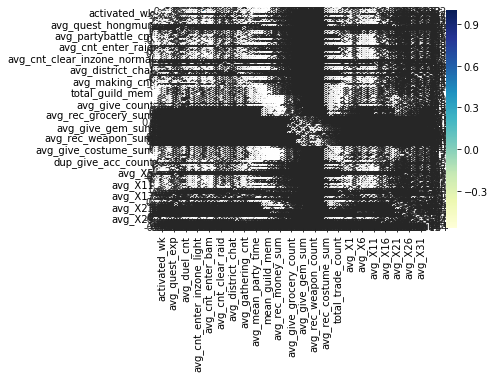

In [4]:
correlations = train.corr(method='pearson')
sns.heatmap(correlations, cmap="YlGnBu", annot = True)
plt.show()

## 상관계수 살펴보기

In [5]:
correlations_abs_sum = correlations.abs().sum()
correlations_abs_sum
print("낮은 것 10개")
print(correlations_abs_sum.nsmallest(10))
print("높은 것 20개")
print(correlations_abs_sum.nlargest(20))

낮은 것 10개
avg_X34                  1.515777
avg_X21                  1.695012
avg_gathering_cnt        1.963772
avg_X29                  2.194278
avg_X8                   2.682576
avg_rec_weapon_sum       3.084859
avg_X30                  3.390644
avg_X27                  3.644276
avg_give_weapon_sum      3.892518
avg_give_weapon_count    4.321685
dtype: float64
높은 것 20개
avg_X10                     31.973686
avg_cnt_clear_raid          31.966995
avg_cnt_enter_raid          31.938531
avg_party_time              31.673494
avg_X13                     31.429383
avg_guild_chat              31.273662
total_trade_count           30.990289
avg_play_time               30.606441
avg_trade_count             30.602238
avg_X31                     30.139779
avg_making_cnt              30.126882
trade_acc_count             29.826313
dup_give_acc_count          29.758540
avg_give_money_count        29.757744
avg_cnt_clear_raid_light    28.885293
avg_give_count              28.837306
avg_cnt_enter_raid_

# 파생변수 설명
* X1 : 플레이시간 대비 전투시간
* X2 : 플레이시간 대비 파티시간
* X3 : 전체 몹 경험치
* X4 : 전체 퀘스트 경험치
* X5 : 전체 홍문 경험치
* X6 : 전체 경험치
* X7 : 단위시간당 경험치
* X8 : 단위시간당 얻은 금화
* X9 : 전체 인던 입장 횟수
* X10 : 전체 레이드 입장 횟수
* X11 : 인던 + 레이드 입장 횟수
* X12 : 전체 인던 클리어 횟수
* X13 : 전체 레이드 클리어 횟수
* X14 : 인던 + 레이드 클리어 횟수
* X15 : 전체 채팅 횟수
* X16 : 일반 채팅 비율
* X17 : 귓속말 비율
* X18 : 지역 채팅 비율
* X19 : 파티 채팅 비율
* X20 : 길드 채팅 비율
* X21 : 세력 채팅 비율
* X22 : 단위시간당 채팅 횟수
* X23 : 주간 얻은 금화
* X24 : 거쳐간 금화 절대값
* X25 : 얻은 잡화
* X26 : 거쳐간 잡화 절대값
* X27 : 단위시간당 X23
* X28 : 단위시간당 X24
* X29 : 단위시간당 X25
* X30 : 단위시간당 X26
* X31 : 채집, 제작 횟수
* X32 : 단위시간당 X31
* X33 : 단위시간당 거래 횟수
* X34 : 단위시간당 유료결제량

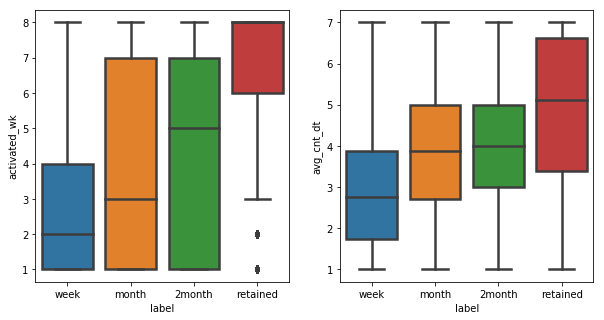

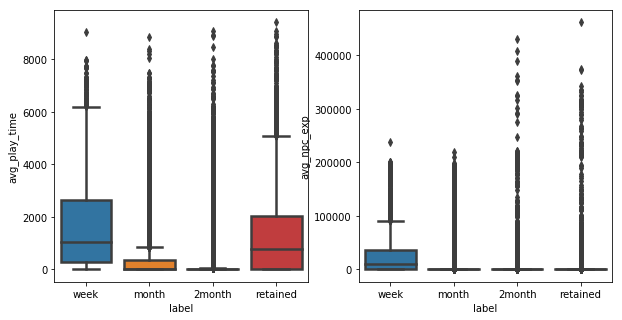

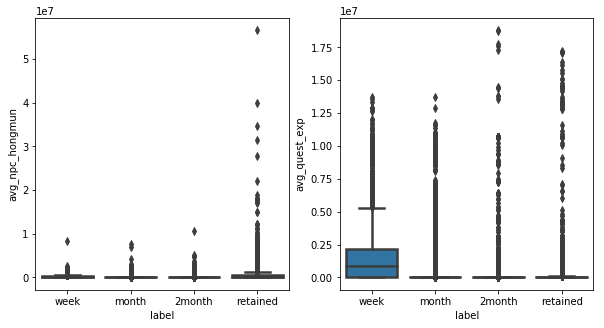

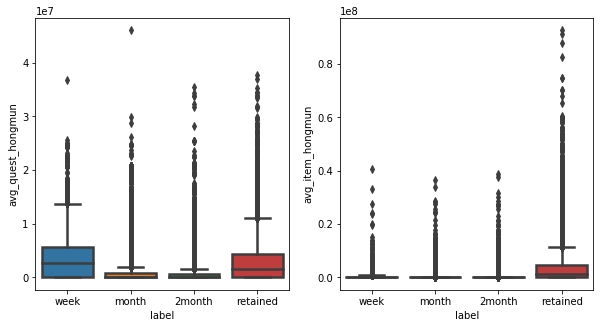

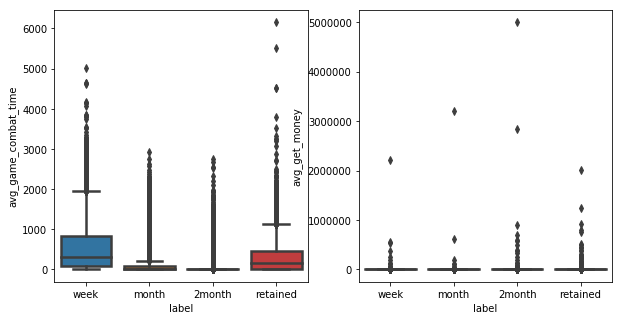

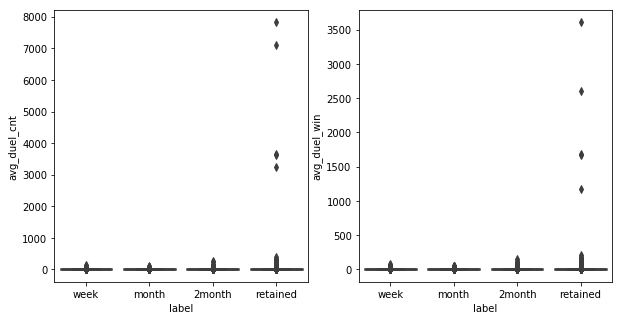

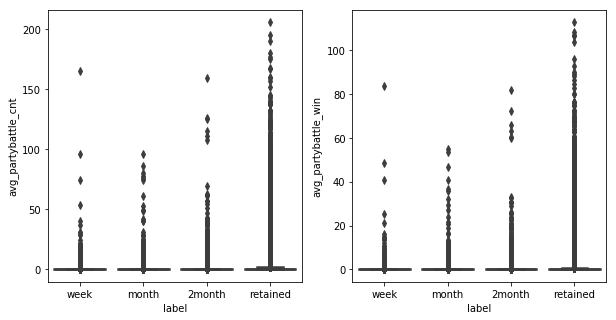

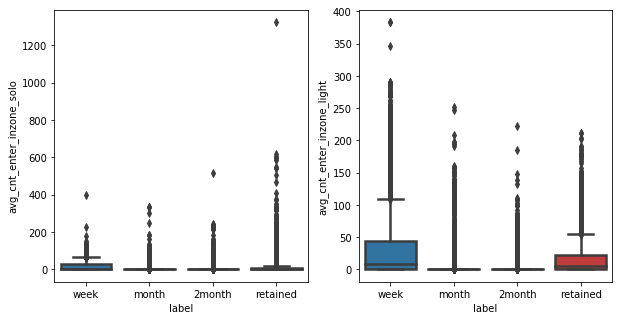

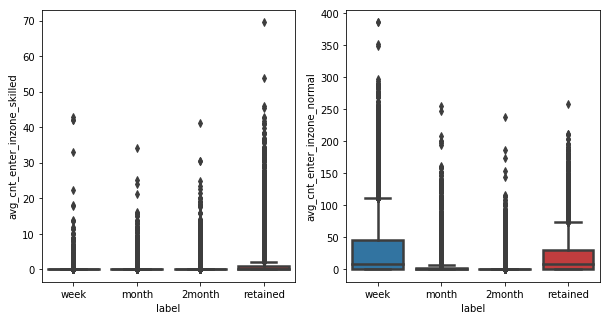

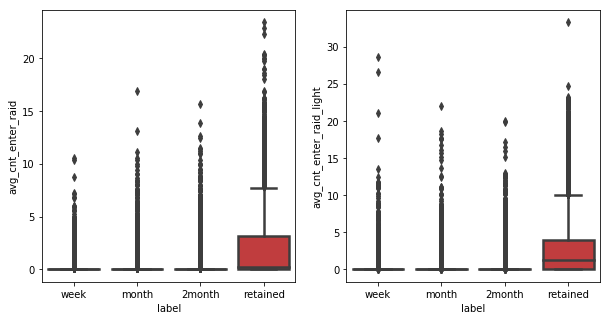

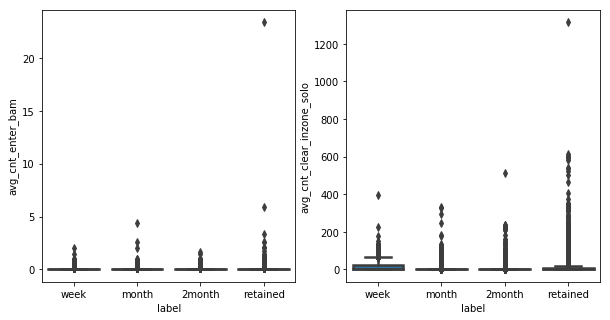

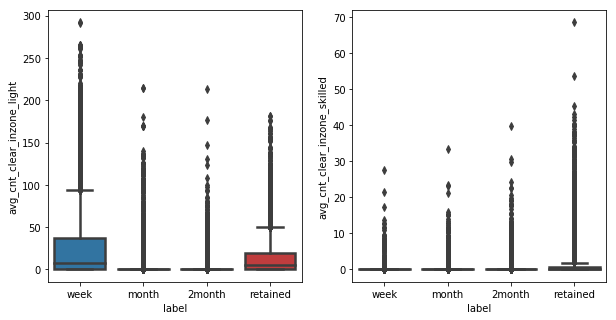

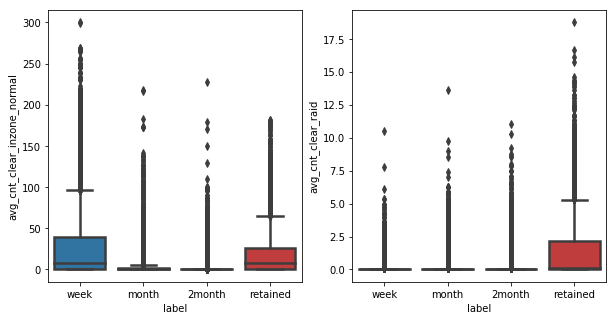

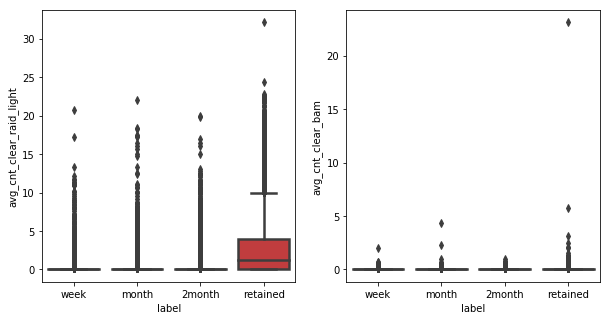

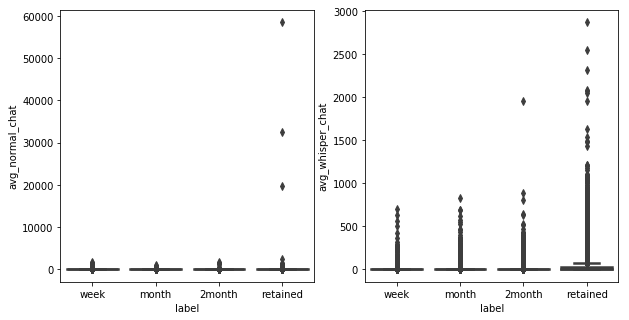

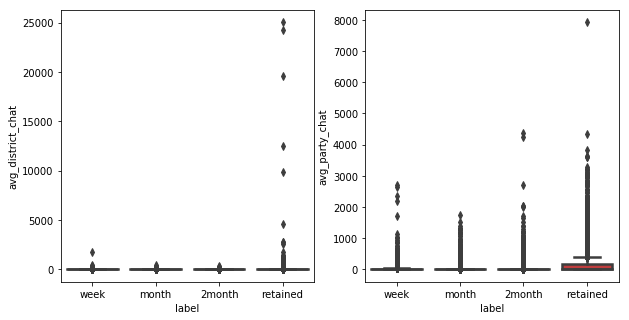

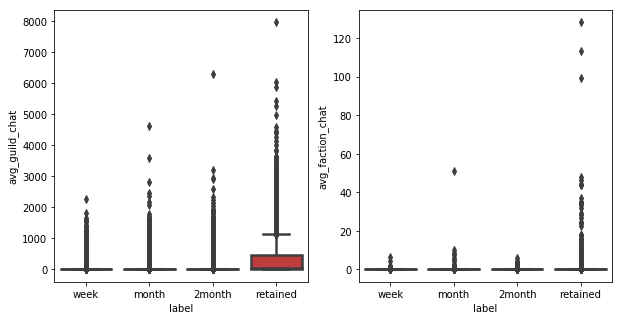

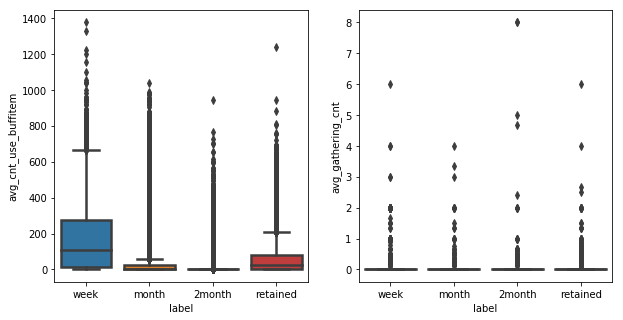

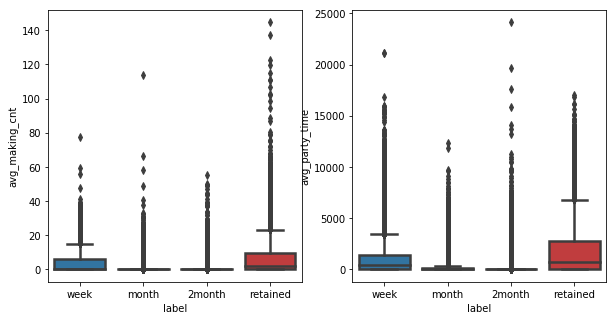

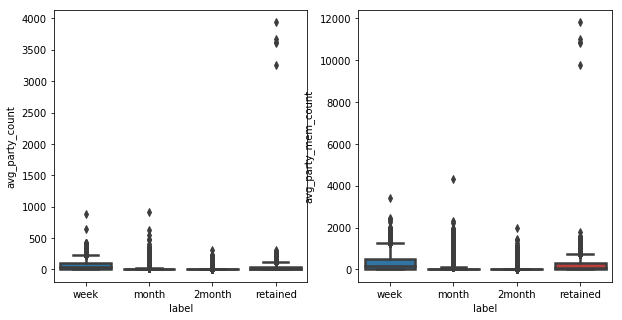

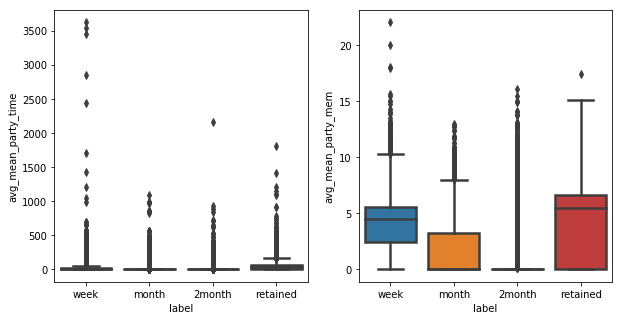

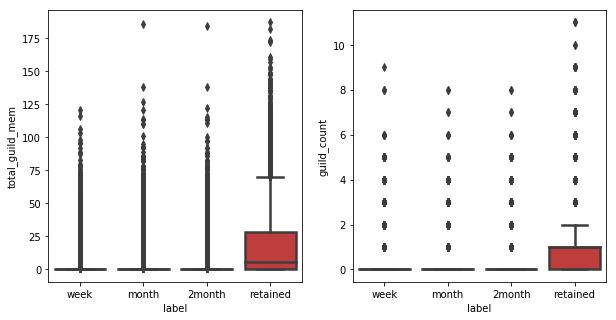

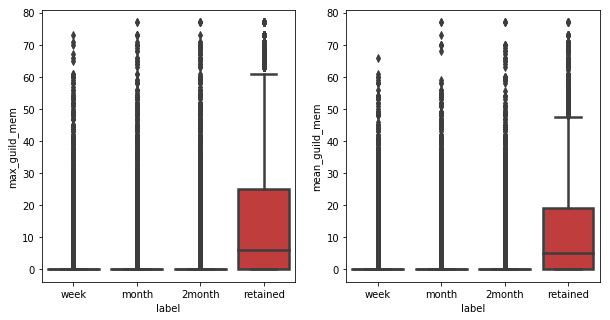

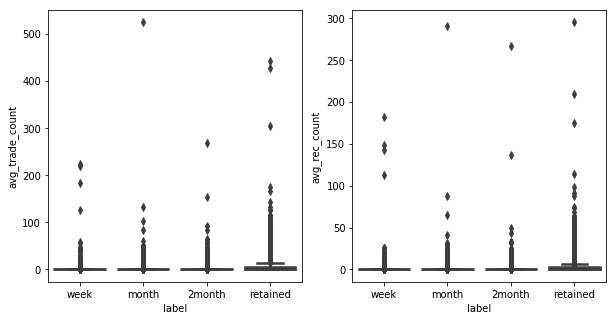

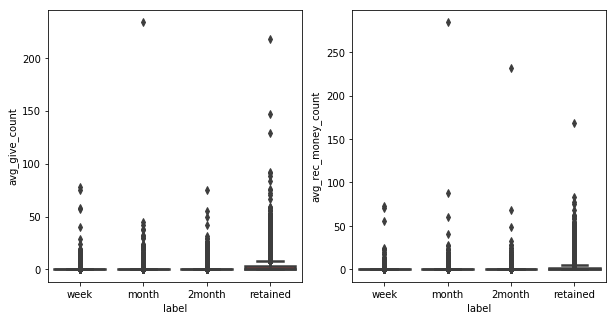

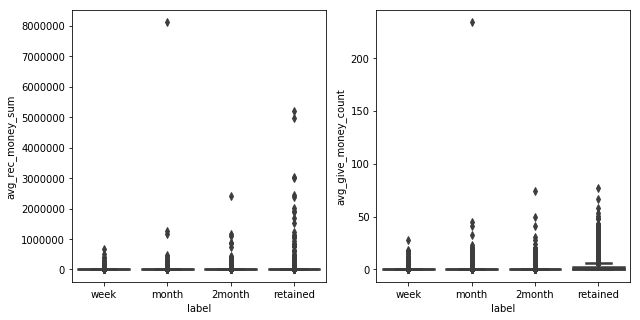

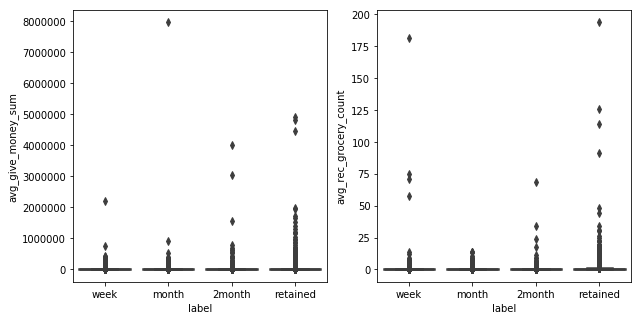

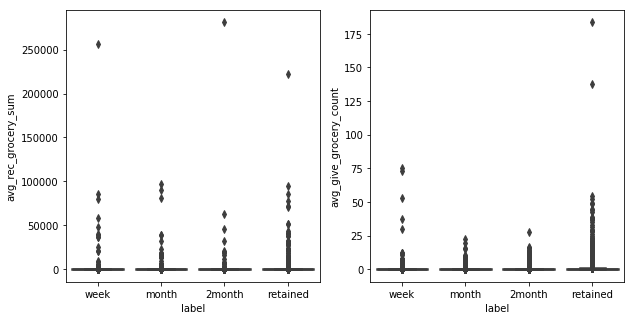

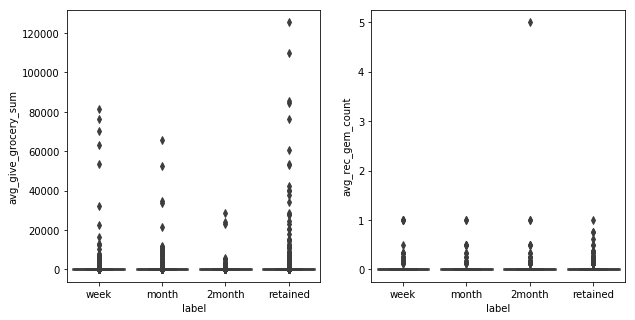

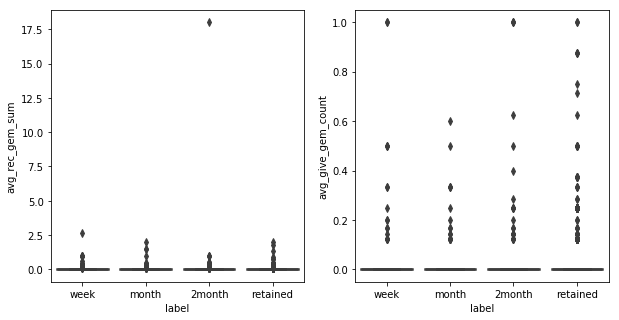

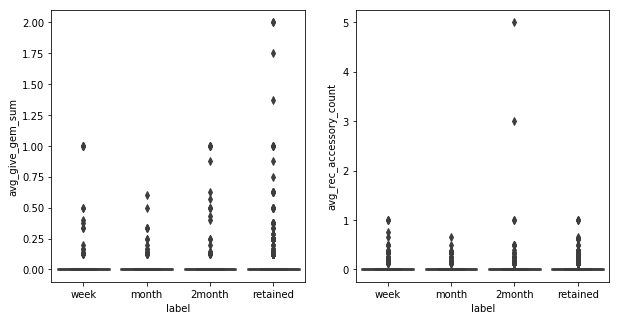

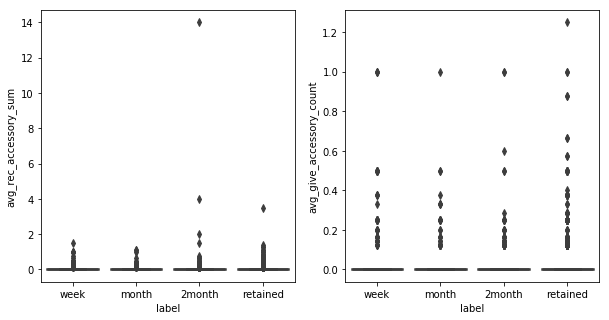

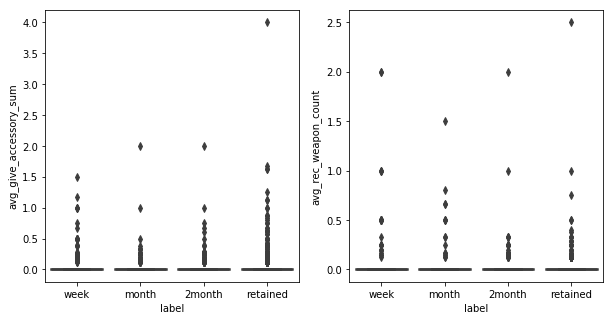

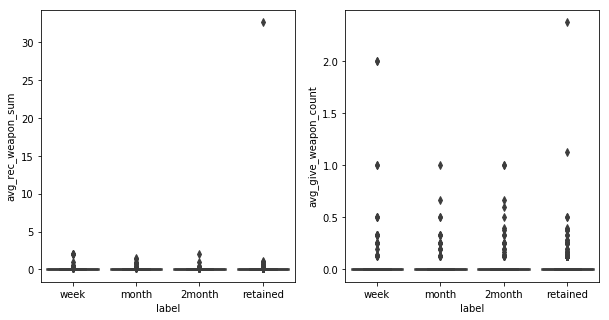

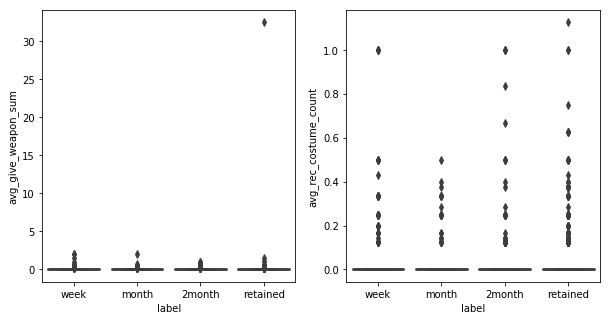

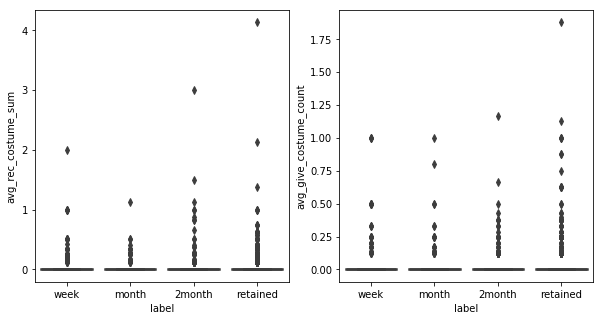

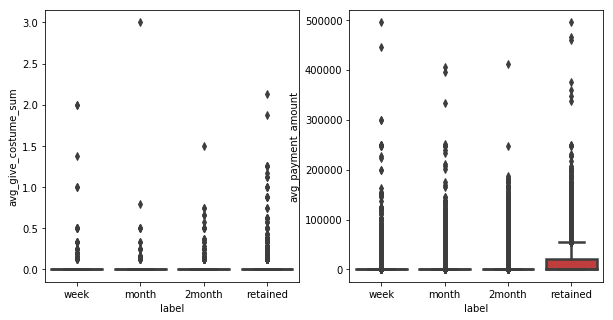

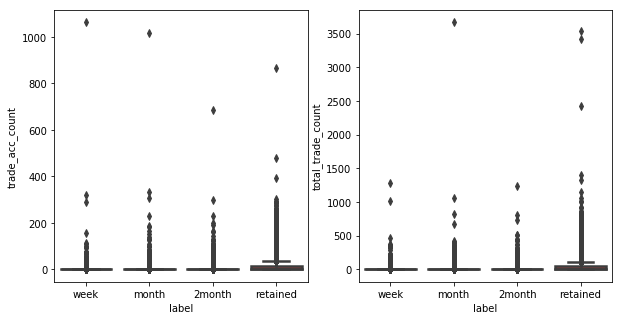

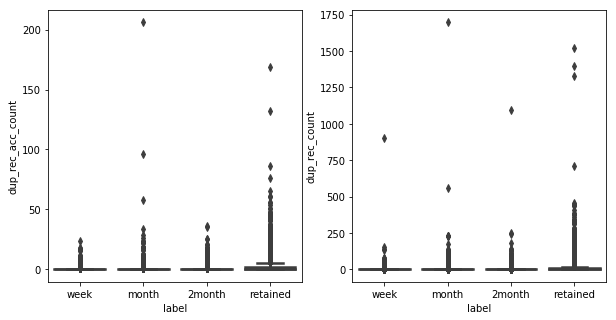

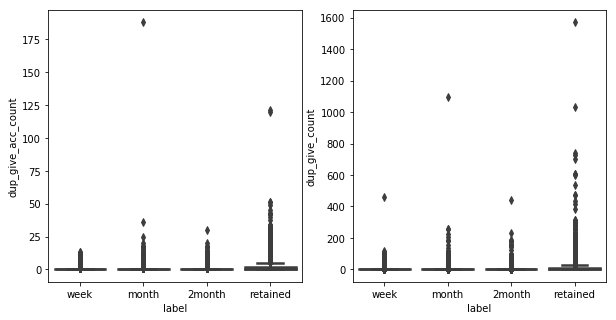

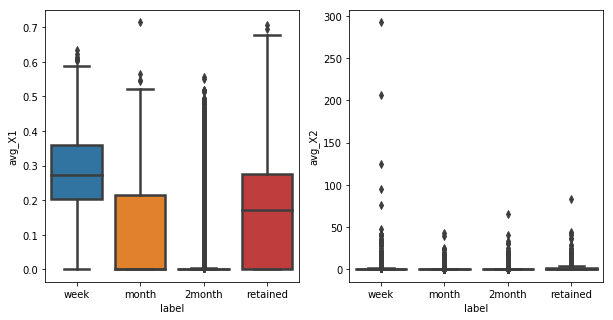

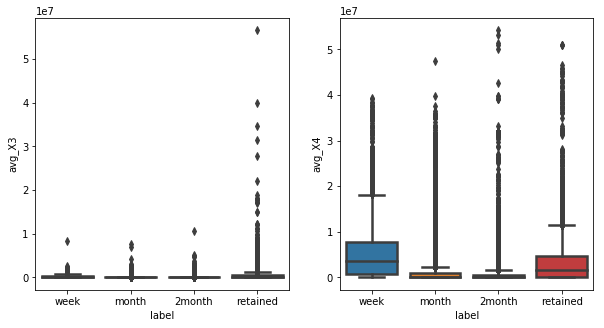

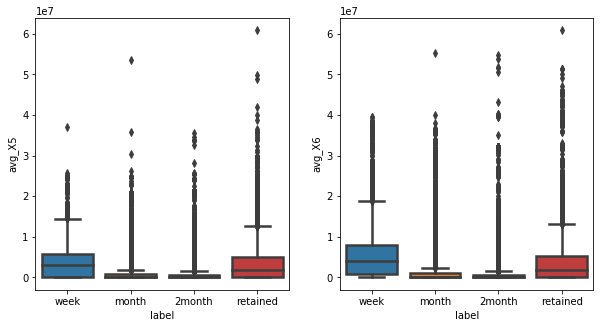

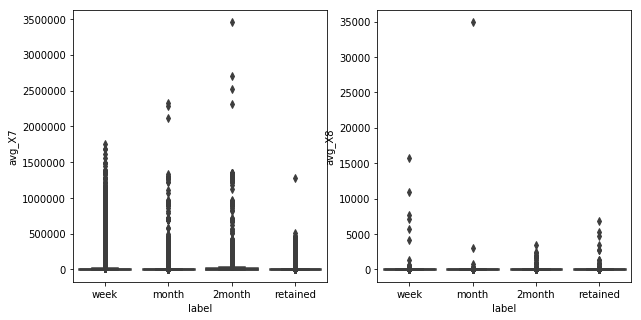

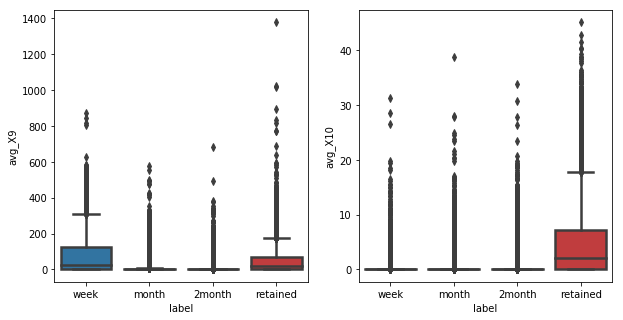

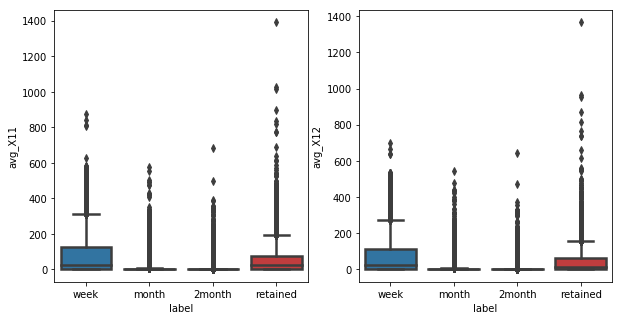

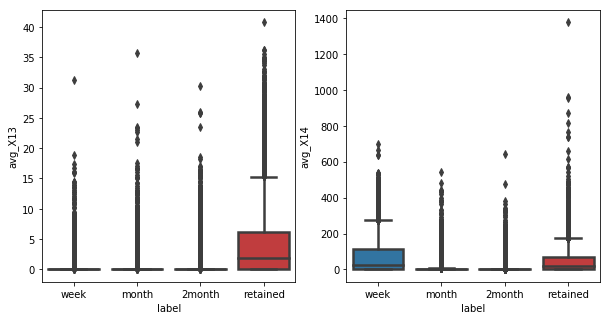

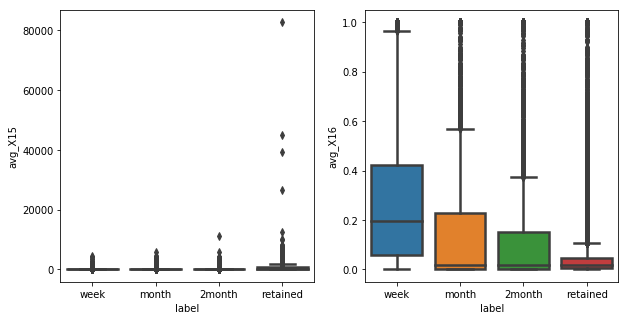

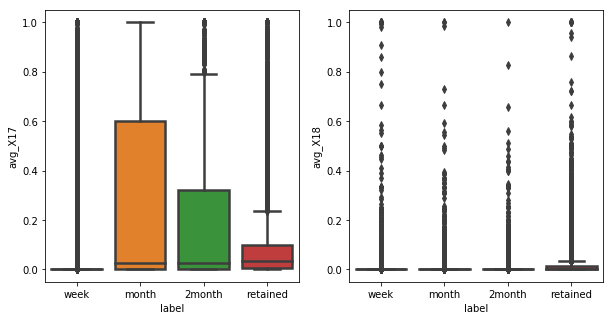

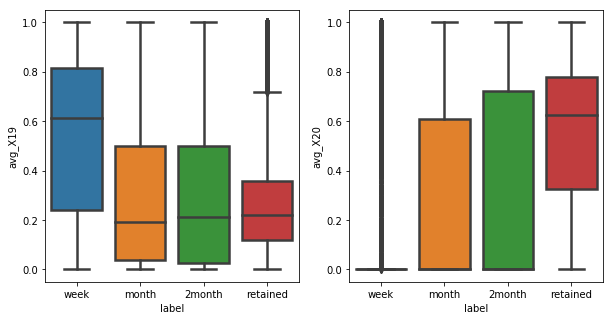

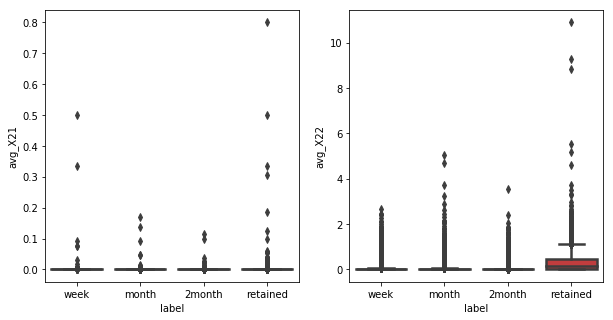

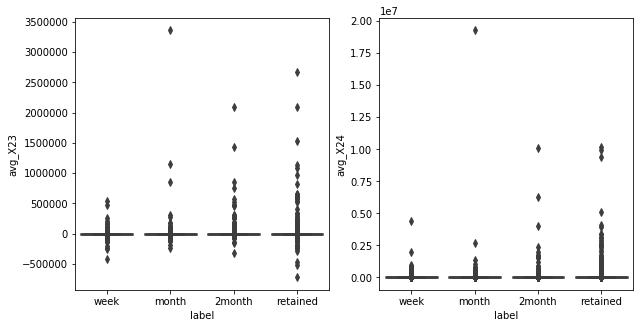

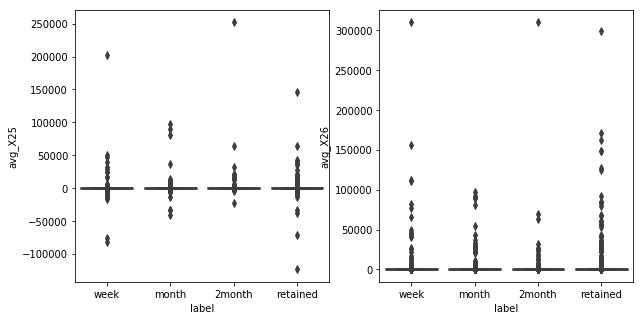

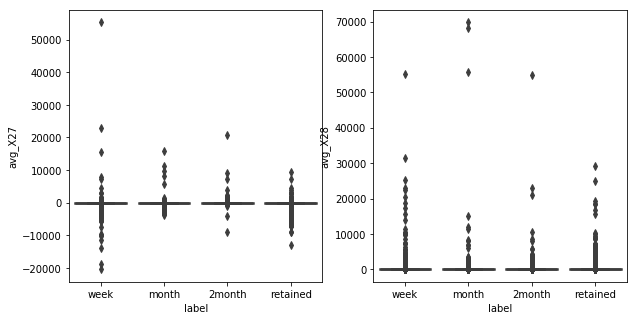

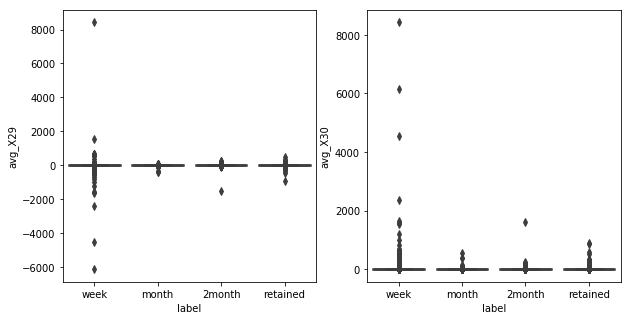

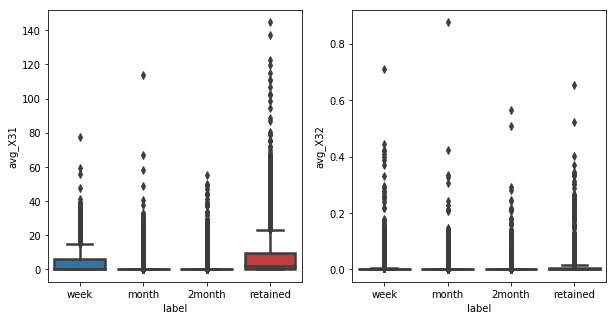

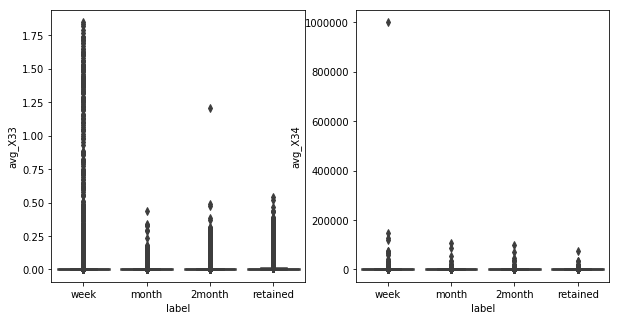

In [6]:
plt.rcParams["figure.figsize"] = (10, 5)

for i in range(1, len(train.columns)//2):
    fig, axis = plt.subplots(ncols=2)
    sns.boxplot(x='label', y=train.columns[2*i], data=train, linewidth=2.5, ax=axis[0], order=order)
    sns.boxplot(x='label', y=train.columns[2*i+1], data=train, linewidth=2.5, ax=axis[1], order=order)
    plt.show()